In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of graficas failed: Traceback (most recent call last):
  File "C:\Users\Apharius\AppData\Roaming\Python\Python314\site-packages\IPython\extensions\autoreload.py", line 322, in check
    elif self.deduper_reloader.maybe_reload_module(m):
         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "C:\Users\Apharius\AppData\Roaming\Python\Python314\site-packages\IPython\extensions\deduperreload\deduperreload.py", line 545, in maybe_reload_module
    new_source_code = f.read()
  File "c:\Program Files\Python314\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 1699: character maps to <undefined>
]


In [14]:
import pandas as pd
import os
import sys

In [15]:
df_original = pd.read_csv('../csv/all_matches.csv')

df_original.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [16]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51070 entries, 0 to 51069
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        51070 non-null  object
 1   home_team   51070 non-null  object
 2   away_team   51070 non-null  object
 3   home_score  51070 non-null  int64 
 4   away_score  51070 non-null  int64 
 5   tournament  51070 non-null  object
 6   country     51070 non-null  object
 7   neutral     51070 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 2.8+ MB


In [17]:
ruta_src = os.path.abspath('../src')
if ruta_src not in sys.path:
    sys.path.append(ruta_src)

In [18]:
from procesamiento import limpiar_y_guardar
archivo_entrada = '../csv/all_matches.csv'
archivo_salida = '../csv/limpia.csv'
 
limpiar_y_guardar(archivo_entrada, archivo_salida)
df_limpia = pd.read_csv(archivo_salida)
df_limpia.head()

¡Limpieza completada! Datos guardados en: ../csv/limpia.csv
Filas resultantes: 256


,date,home_team,away_team,home_score,away_score,tournament,country
0,2010-06-11,South Africa,Mexico,1,1,World Cup,South Africa
1,2010-06-11,France,Uruguay,0,0,World Cup,South Africa
2,2010-06-12,South Korea,Greece,2,0,World Cup,South Africa
3,2010-06-12,Argentina,Nigeria,1,0,World Cup,South Africa
4,2010-06-12,England,United States,1,1,World Cup,South Africa


In [19]:
df_limpia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        256 non-null    object
 1   home_team   256 non-null    object
 2   away_team   256 non-null    object
 3   home_score  256 non-null    int64 
 4   away_score  256 non-null    int64 
 5   tournament  256 non-null    object
 6   country     256 non-null    object
dtypes: int64(2), object(5)
memory usage: 14.1+ KB


In [20]:
from graficas import preparar_datos_colombia, graficar_rendimiento
from graficas_espana import preparar_datos_espana, graficar_rendimiento_espana

Tabla de datos generada para Colombia:


,date,home_team,away_team,goles_favor,resultado
70,2014-06-14,Colombia,Greece,3,Ganado
85,2014-06-19,Colombia,Ivory Coast,2,Ganado
100,2014-06-24,Colombia,Japan,4,Ganado
112,2014-06-28,Colombia,Uruguay,2,Ganado
120,2014-07-04,Brazil,Colombia,1,Perdido
142,2018-06-19,Japan,Colombia,1,Perdido
159,2018-06-24,Colombia,Poland,3,Ganado
174,2018-06-28,Colombia,Senegal,1,Ganado
182,2018-07-03,Colombia,England,1,Empatado


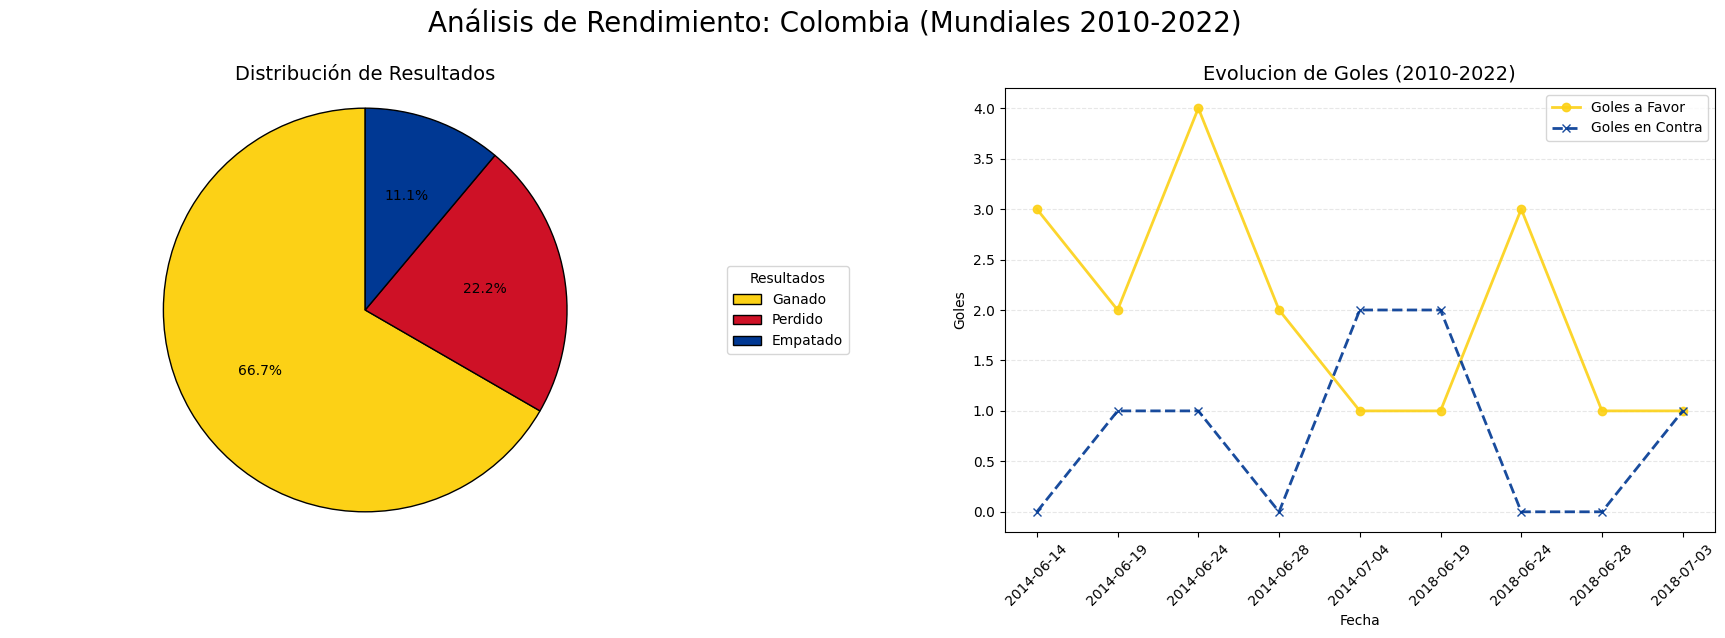

In [21]:
df_colombia = preparar_datos_colombia(df_limpia)
print("Tabla de datos generada para Colombia:")
display(df_colombia[['date', 'home_team', 'away_team', 'goles_favor', 'resultado']])

graficar_rendimiento(df_colombia)

In [ ]:
#Con el rendimiento de colombia en los mundiales que participo se puede afirmar que:
# 2014 aporta la el mayor porcentaje de victoras en el porsentaje del diagrama circular
# Justamente en a finales de 2014 empieza el declive de goles a favor por los partidos perdidos, y en el final
#por el empate contra ingletella la grafica coincide.

Tabla de datos generada para España:


,date,home_team,away_team,goles_favor,resultado
16,2010-06-16,Switzerland,Spain,0,Perdido
30,2010-06-21,Spain,Honduras,2,Ganado
46,2010-06-25,Spain,Chile,2,Ganado
55,2010-06-29,Spain,Portugal,1,Ganado
59,2010-07-03,Spain,Paraguay,1,Ganado
61,2010-07-07,Spain,Germany,1,Ganado
63,2010-07-11,Spain,Netherlands,1,Ganado
67,2014-06-13,Netherlands,Spain,1,Perdido
83,2014-06-18,Chile,Spain,0,Perdido
96,2014-06-23,Spain,Australia,3,Ganado


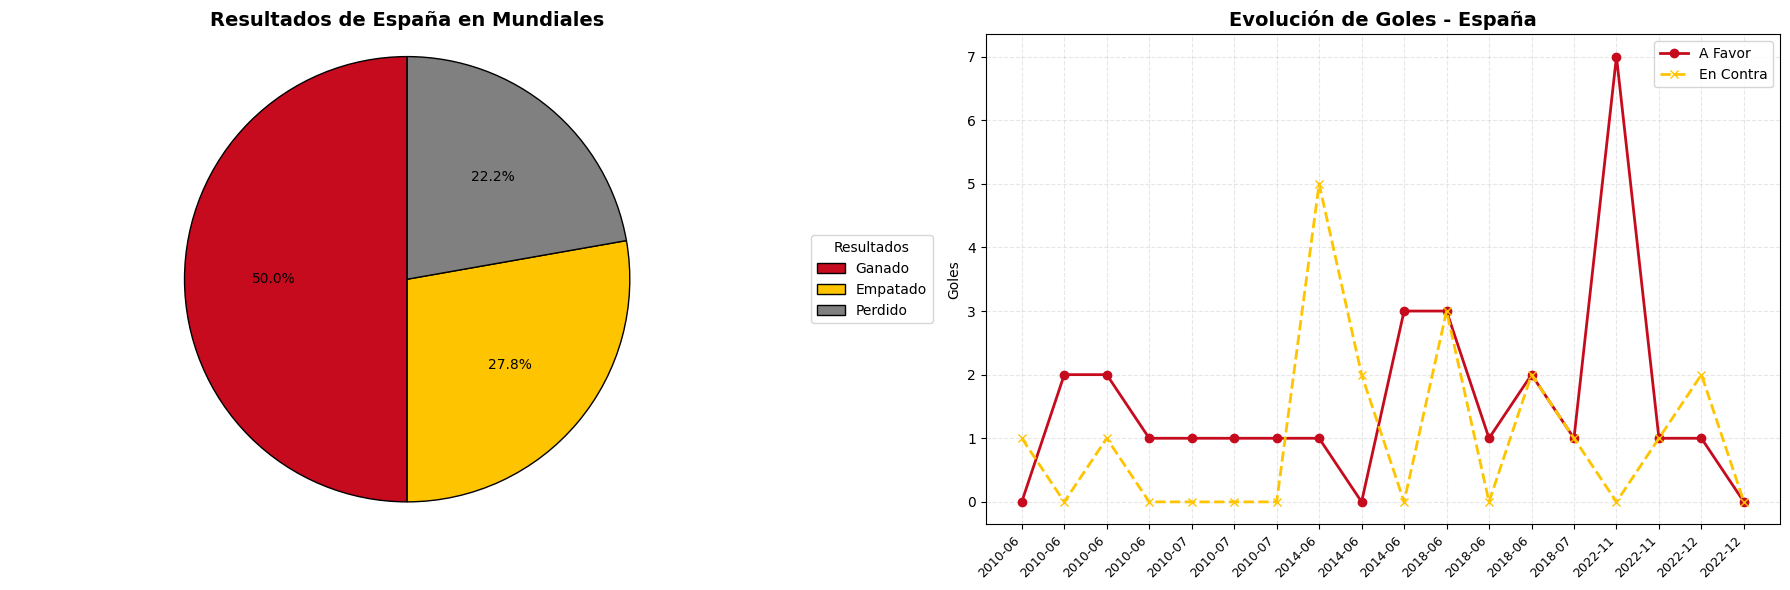

In [23]:
df_limpia['date'] = pd.to_datetime(df_limpia['date']) 
df_espana = preparar_datos_espana(df_limpia)
print("Tabla de datos generada para España:")
display(df_espana[['date', 'home_team', 'away_team', 'goles_favor', 'resultado']])
graficar_rendimiento_espana(df_espana)

In [ ]:
#España por su parte, posee mayor historal de participacion en los mundiales, teniendo un relativo valance entre victorias, empates y derrotas.
# la evolucion de goles tiene ciertos puntos de empate y un pico de goles a favor que corresponde al enfrentamiento contra costarica. 

#Esto demuestra que para tener sufuceintes datos par tomar a colombia como punto clave se necesecitan mas datos.